In [1]:
import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import original messy Table 2 and delete extra rows without data
#Total means sum of female+male population
col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','1990 Total',
             '1995 Total', '2000 Total','2005 Total', '2010 Total', '2015 Total','1990 Male', '1995 Male', '2000 Male'
             ,'2005 Male', '2010 Male','2015 Male','1990 Female', '1995 Female', '2000 Female','2005 Female',
             '2010 Female','2015 Female']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 2',skiprows=16,header=None,usecols=list(range(1,22)),names=col_names)
df2.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

    1990 Total   1995 Total   2000 Total   2005 Total   2010 Total  \
0  5309667.699  5735123.084  6126622.121  6519635.850  6929725.043   
1  1144463.062  1169761.211  1188811.731  1208919.509  1233375.711   
2  4165204.637  4565361.873  4937810.390  5310716.341  5696349.332   
3   510057.629   585189.354   664386.087   752804.951   847254.847   
4  3655147.008  3980172.519  4273424.303  4557911.390  4849094.485   

    2015 Total    1990 Male  ...    2000 Male    2005 Male    2010 Male  \
0  7349472.099  2670423.701  ...  3084537.662  3285082.249  3493956.904   
1  1251351.086   555255.626  ...   578010.218   587962.213   599955.476   
2  6098121.013  2115168.075  ...  2506527.444  2697120.036  2894001.428   
3   954157.804   254042.556  ...   331482.475   375757.715   422397.532   
4  5143963.209  1861125.519  ...  2175044.969  2321362.321  2471603.896   

     2015 Male  1990 Female  1995 Female  2000 Female  2005 Female  \
0  3707205.753  2639243.998  2848487.191  3042084.459  3234553.601   
1   609297.148   589207.436   601492.755   610801.513   620957.296   
2  3097908.605  2050036.562  2246994.436  2431282.946  2613596.305   
3   476031.179   256015.073   293162.612   332903.612   377047.236   
4  2621877.426  1794021.489  1953831.824  2098379.334  2236549.069   

   2010 Female  2015 Female  
0  3435768.139  3642266.346  
1   633420.235   642053.938  
2  2802347.904  3000212.408  
3   424857.315   478126.625  
4  2377490.589  2522085.783  

[5 rows x 21 columns]

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Major Area, Region, Country or Area of Destination  265 non-null    object 
 1   Notes                                               26 non-null     object 
 2   Country Code                                        265 non-null    int64  
 3   1990 Total                                          265 non-null    float64
 4   1995 Total                                          265 non-null    float64
 5   2000 Total                                          265 non-null    float64
 6   2005 Total                                          265 non-null    float64
 7   2010 Total                                          265 non-null    float64
 8   2015 Total                                          265 non-null    float64
 9  

In [5]:
df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code'],value_name='Population')
df3.head(5)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

     variable   Population  
0  1990 Total  5309667.699  
1  1990 Total  1144463.062  
2  1990 Total  4165204.637  
3  1990 Total   510057.629  
4  1990 Total  3655147.008

In [6]:
#make new columns for year, male female, total, and population
df3['Year'] = df3['variable'].str[0:4]
df3['Year'].head(10)

0    1990
1    1990
2    1990
3    1990
4    1990
5    1990
6    1990
7    1990
8    1990
9    1990
Name: Year, dtype: object

In [7]:
#combo contains data for male and female and total
df3['combo'] = df3['variable'].str[5:]
df3['combo'].head(10)

0    Total
1    Total
2    Total
3    Total
4    Total
5    Total
6    Total
7    Total
8    Total
9    Total
Name: combo, dtype: object

In [8]:
df3.head(50)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                               WORLD   NaN           900   
1                                   Developed regions   (b)           901   
2                                  Developing regions   (c)           902   
3                           Least developed countries   (d)           941   
4   Less developed regions excluding least develop...   NaN           934   
5                                  Sub-Saharan Africa   (e)           947   
6                                              Africa   NaN           903   
7                                      Eastern Africa   NaN           910   
8                                             Burundi   NaN           108   
9                                             Comoros   NaN           174   
10                                           Djibouti   NaN           262   
11                                            Eritrea   NaN           232   
12                                           Ethiopia   NaN           231   
13                                              Kenya   NaN           404   
14                                         Madagascar   NaN           450   
15                                             Malawi   NaN           454   
16                                          Mauritius   (1)           480   
17                                            Mayotte   NaN           175   
18                                         Mozambique   NaN           508   
19                                            Réunion   NaN           638   
20                                             Rwanda   NaN           646   
21                                         Seychelles   NaN           690   
22                                            Somalia   NaN           706   
23                                        South Sudan   NaN           728   
24                                             Uganda   NaN           800   
25                        United Republic of Tanzania   (2)           834   
26                                             Zambia   NaN           894   
27                                           Zimbabwe   NaN           716   
28                                      Middle Africa   NaN           911   
29                                             Angola   NaN            24   
30                                           Cameroon   NaN           120   
31                           Central African Republic   NaN           140   
32                                               Chad   NaN           148   
33                                              Congo   NaN           178   
34                   Democratic Republic of the Congo   NaN           180   
35                                  Equatorial Guinea   NaN           226   
36                                              Gabon   NaN           266   
37                              Sao Tome and Principe   NaN           678   
38                                    Northern Africa   NaN           912   
39                                            Algeria   NaN            12   
40                                              Egypt   NaN           818   
41                                              Libya   NaN           434   
42                                            Morocco   NaN           504   
43                                              Sudan   (3)           729   
44                                            Tunisia   NaN           788   
45                                     Western Sahara   NaN           732   
46                                    Southern Africa   NaN           913   
47                                           Botswana   NaN            72   
48                                            Lesotho   NaN           426   
49                                            Namibia   NaN           516   

      variable   Population  Year  combo  
0   1990 Total  5309667.699  199

In [9]:
#Cleaned Table 2 -  Total population at mid-year by sex
#and by major area, region, country or area, 1990-2015 (thousands)
    ##includes new column for Female, Male, and Total population
    
final_table = pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Year'],columns='combo',values='Population').reset_index().rename_axis(None,axis=1)

final_table.rename(columns={'Total': 'Total population (both sexes)','Male': 'Male population','Female': 'Female Population'}
                   , inplace=True)


final_table.head(10
                 
                )





Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                        Afghanistan   NaN             4   
1                                        Afghanistan   NaN             4   
2                                        Afghanistan   NaN             4   
3                                        Afghanistan   NaN             4   
4                                        Afghanistan   NaN             4   
5                                        Afghanistan   NaN             4   
6                                             Africa   NaN           903   
7                                             Africa   NaN           903   
8                                             Africa   NaN           903   
9                                             Africa   NaN           903   

   Year Female Population Male population Total population (both sexes)  
0  1990          5887.736        6179.834                      12067.57  
1  1995           8090.08        8682.442                     16772.522  
2  2000          9555.403       10146.537                      19701.94  
3  2005         11783.622       12616.326                     24399.948  
4  2010         13594.574       14367.633                     27962.207  
5  2015         15752.858       16773.704                     32526.562  
6  1990        316542.926      315071.378                    631614.304  
7  1995        361007.568      359408.818                    720416.386  
8  2000        407657.585      406405.564                    814063.149  
9  2005        460648.416      459590.529                    920238.945

In [10]:
#select data by continent
df_by_region = final_table[final_table['Country Code'].isin([903,935,908,909,904, 905])]

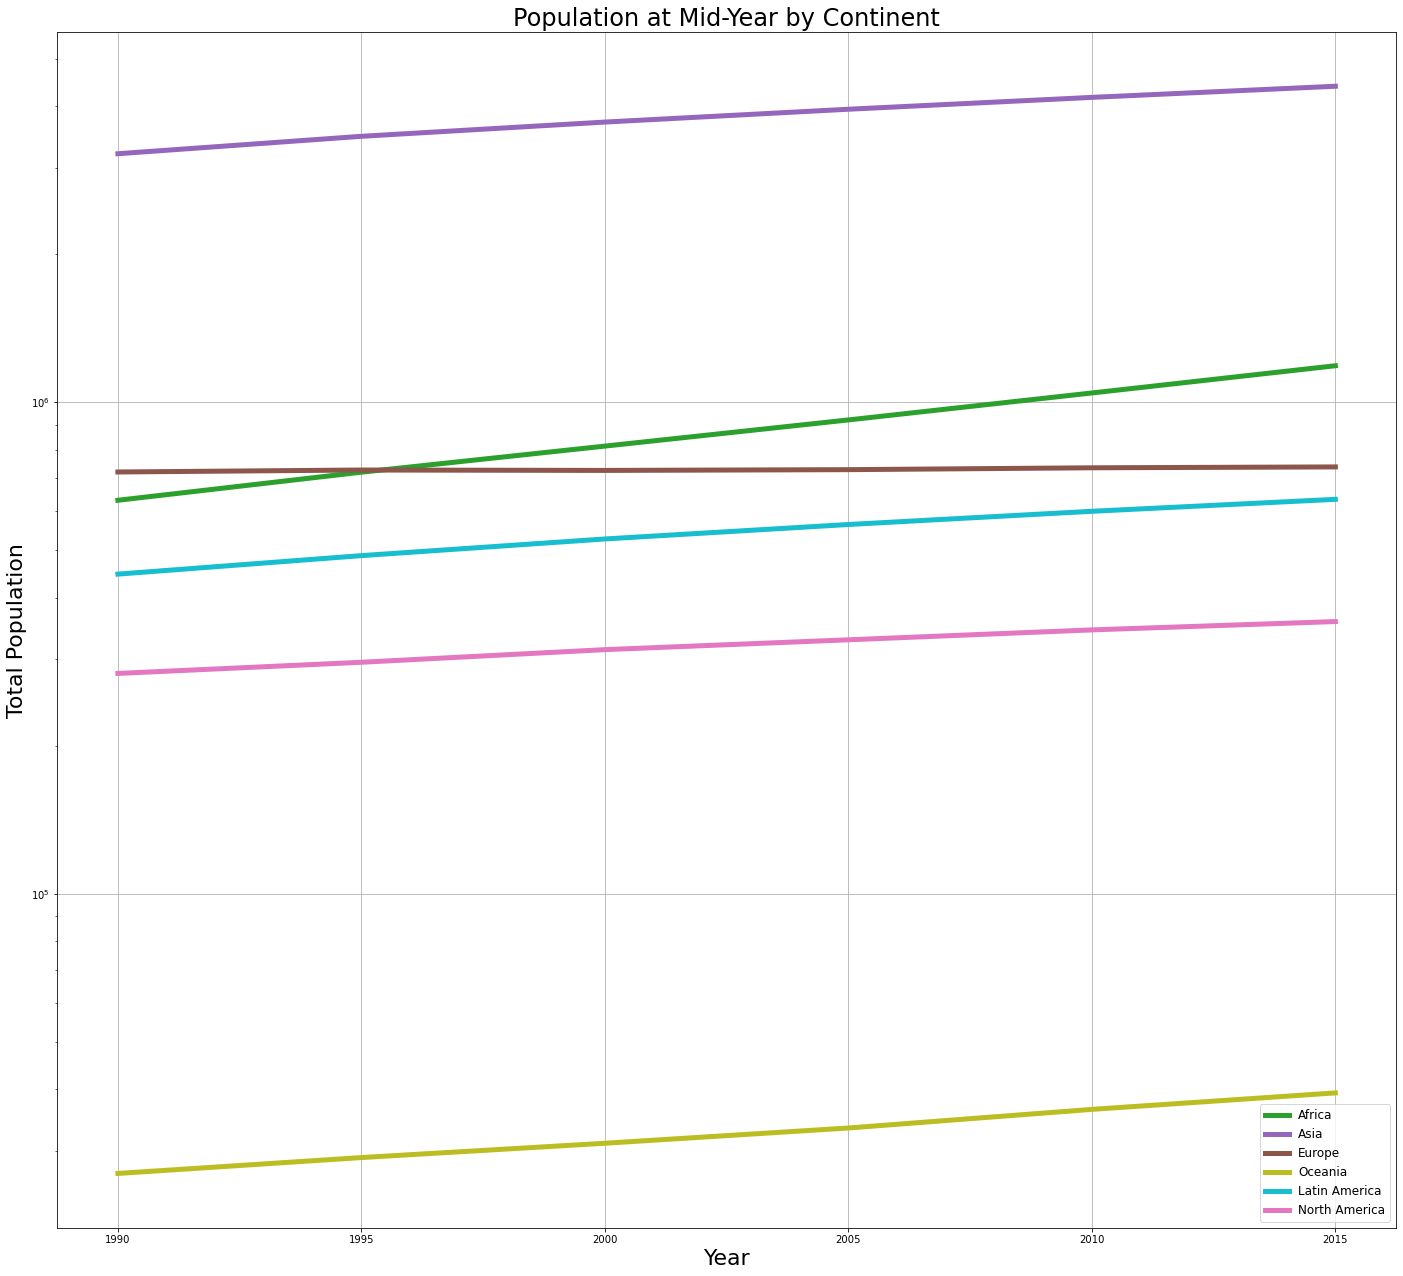

In [12]:
#create continent and population graph
# create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(24, 22)

# scatter male against female
x = df_by_region['Year'][:6].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Total population (both sexes)'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Total population (both sexes)'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Total population (both sexes)'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Total population (both sexes)'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Total population (both sexes)'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Total population (both sexes)'].values
w = 0.7
rects1 = ax.plot(x, y_africa, color='tab:green',linewidth=5.00)
rects2 = ax.plot(x, y_asia, color='tab:purple',linewidth=5.00)
rects3 = ax.plot(x, y_europe, color='tab:brown',linewidth=5.00)
rects4 = ax.plot(x, y_oceanian, color='tab:olive',linewidth=5.00)
rects5 = ax.plot(x, y_latin, color='tab:cyan',linewidth=5.00)
rects6 = ax.plot(x, y_north_america, color='tab:pink',linewidth=5.00)

ax.set_yscale('log')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title('Population at Mid-Year by Continent', fontsize=24)
ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Total Population',fontsize=22)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]),
          ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'), fontsize=12 )